# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Get test and train data

In [4]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.0, 0.2)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 2588 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 13 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 183 rows -> systolic bp too low.
Dropped 46 rows -> systolic bp too high.
Dropped 38 rows -> diastolic bp too low.
Dropped 904 rows -> diastolic bp too high.
Dropped 98 rows -> sytolic bp was lower than diastolic.


C:\Users\SchnitM5\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


# Model without tuning

## Create and train the model

In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

# Evaluation

## Prediction

In [7]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)
y_proba = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.736933666137206

Precision Score:
0.7577026121902211

Recall Score:
0.6902074435631482

F1-Score:
0.7223818646232438

Cost:
5509



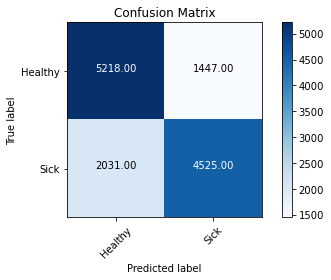

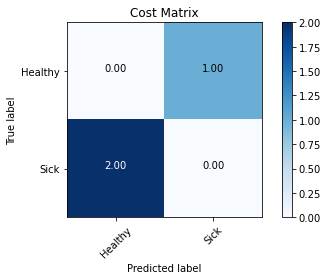

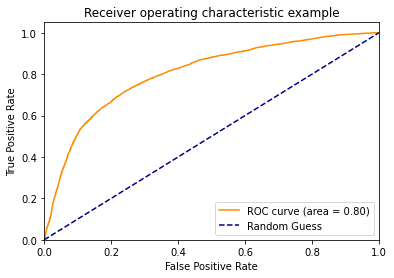


ROC Score:
0.8031885373722931


In [8]:
show_evaluation(y_test, y_pred, y_proba)

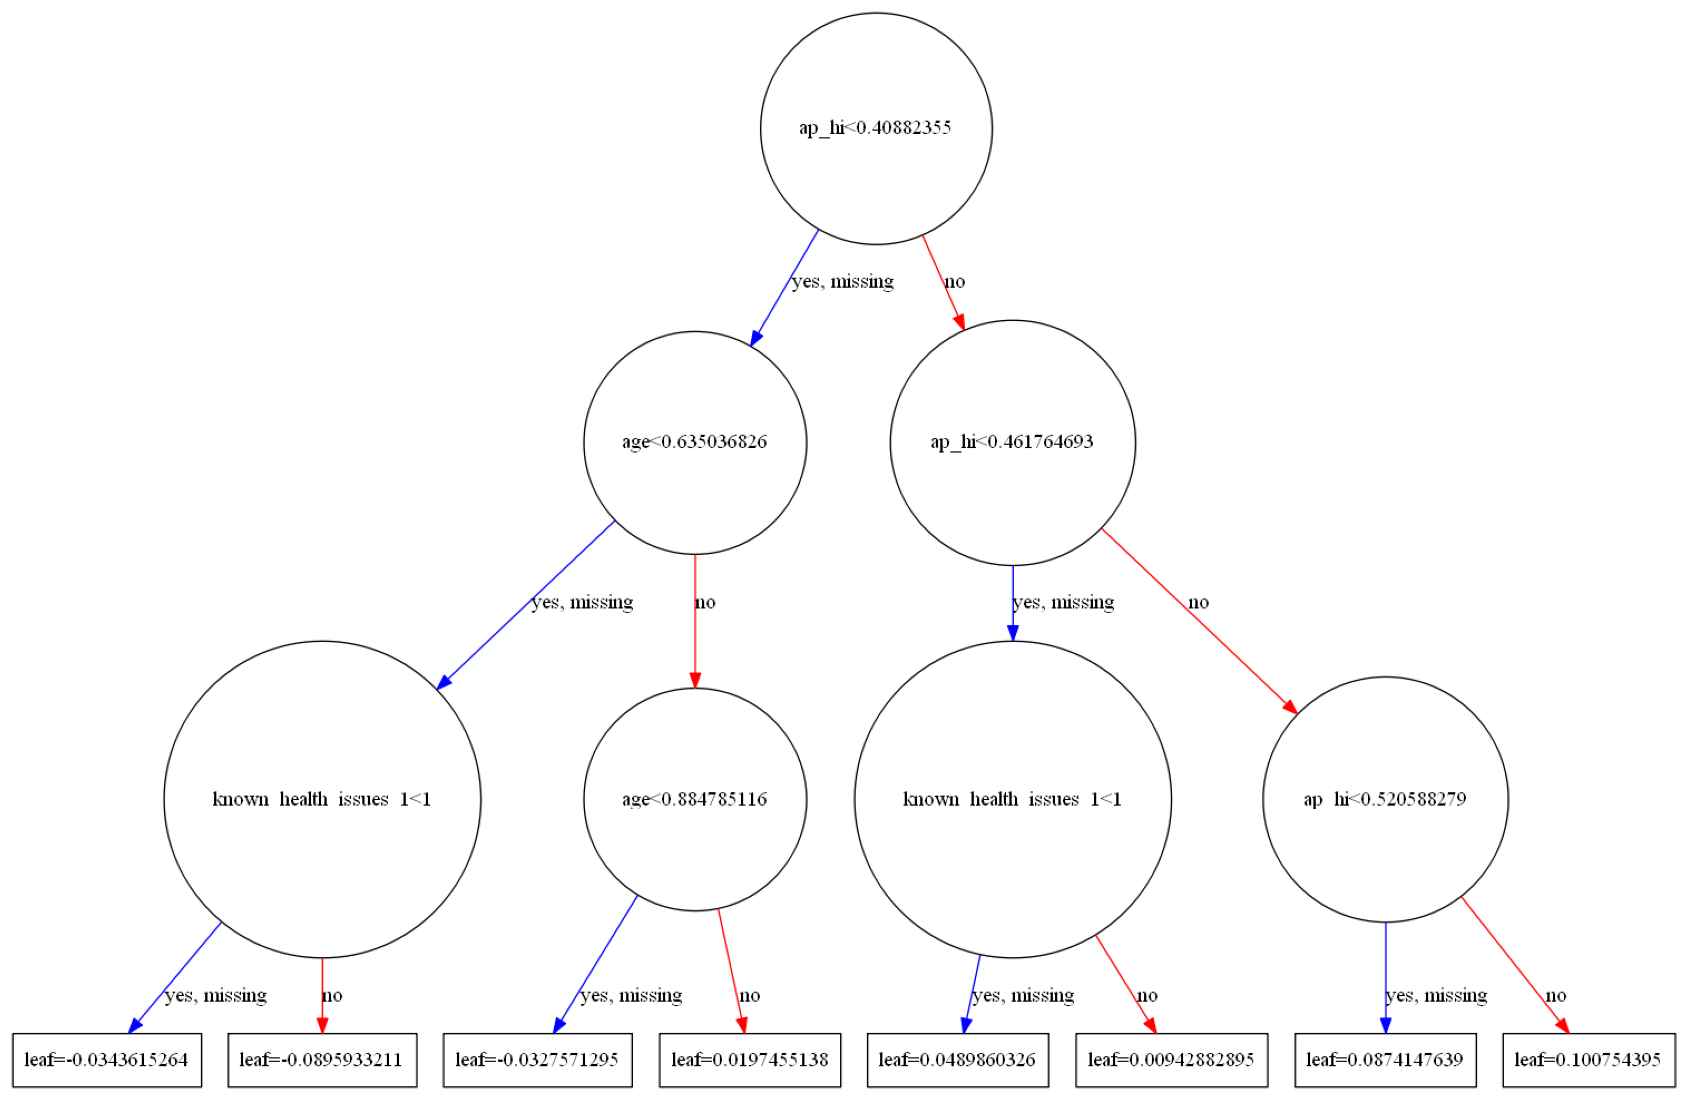

In [9]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

# Model(s) with tuning

### Tune max_depth and min_child_weight

In [10]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 4.00510435,  4.48151808,  4.44119797,  6.41360197,  6.21921282,
          7.27743511, 10.80602808,  9.89400477,  8.27120466, 11.15360622,
         12.9842422 ,  9.99423785]),
  'std_fit_time': array([0.1770288 , 0.20319751, 0.23235709, 0.07294549, 0.28694725,
         0.7152807 , 0.34606163, 0.62376934, 0.10443719, 0.28060901,
         0.86816559, 1.35625194]),
  'mean_score_time': array([0.0514051 , 0.06080089, 0.05360065, 0.06600146, 0.07820611,
         0.08100338, 0.09580564, 0.10220199, 0.0774024 , 0.09820123,
         0.11060162, 0.07880306]),
  'std_score_time': array([0.00875766, 0.00849483, 0.00706252, 0.00303303, 0.01123232,
         0.01244328, 0.0142497 , 0.02978811, 0.00553368, 0.01630165,
         0.01217429, 0.00661264]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [11]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 3.29680262,  3.35359373,  2.99820023,  4.08940005,  4.12159929,
          4.16060319,  8.09060588, 44.76740789, 10.45260715]),
  'std_fit_time': array([ 0.16025297,  0.33366084,  0.05995273,  0.06111623,  0.04587292,
          0.09410033,  1.93994578, 16.87159735,  4.41247499]),
  'mean_score_time': array([0.07960119, 0.05040383, 0.04440179, 0.05080261, 0.05100074,
         0.05740371, 0.08560123, 0.10640302, 0.06779957]),
  'std_score_time': array([0.01929488, 0.0032014 , 0.00508259, 0.00735797, 0.00505897,
         0.00776292, 0.03066354, 0.03399673, 0.01345265]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                    

### Tune gamma

In [12]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 4.23541403,  4.31263461,  6.0924047 , 10.99377613,  6.34804001]),
  'std_fit_time': array([0.02117323, 0.06680092, 1.42563383, 1.76023101, 1.89989717]),
  'mean_score_time': array([0.07459798, 0.06159945, 0.09140253, 0.09380198, 0.0646009 ]),
  'std_score_time': array([0.00527421, 0.00783687, 0.03670315, 0.05431766, 0.01383501]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.79603877, 0.79603723, 0.79603816, 0.79608985, 0.79609032]),
  'split1_test_score': array([0.7924571 , 0.79243763, 0.79245594, 0.79244033, 0.79244018]),
  'split2_test_score': array([0.79853174, 0.79853174, 0.79853174, 0.79853289, 0.79853922]),
  'split3_test_score': array([0.79210622, 0.79210583, 0.79206513, 0.79207235, 0.792072

### Recheck model

In [13]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)
y_proba1 = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.7365554799183118

Precision Score:
0.7536734356942381

Recall Score:
0.6963087248322147

F1-Score:
0.7238563386981685

Cost:
5474



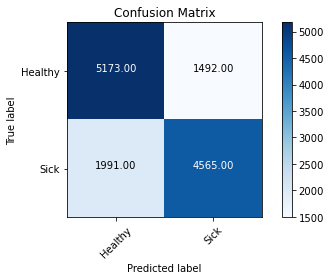

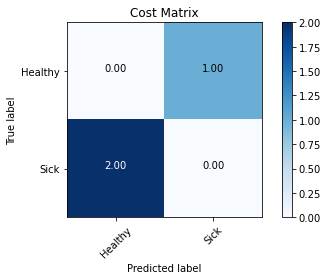

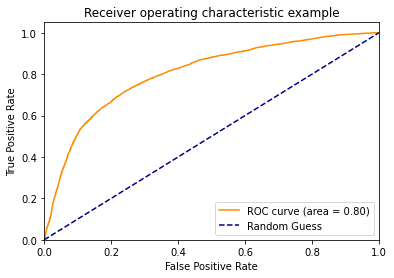


ROC Score:
0.8031885373722931


In [14]:
show_evaluation(y_test, y_pred1, y_proba1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

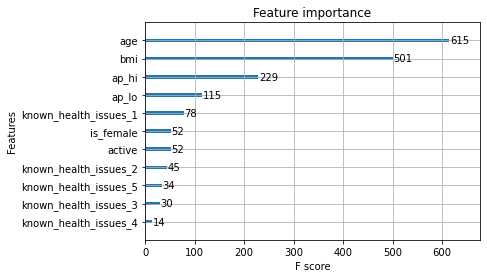

In [15]:
xgb.plot_importance(model1)

### Tune subsample and colsample_bytree

In [16]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([3.83579884, 3.67680159, 3.53240042, 3.40480461, 3.98699961,
         3.86239891, 3.92220192, 4.010604  , 4.46500034, 4.50760131,
         4.06039958, 4.0098    , 4.86680355, 4.76360159, 4.73219881,
         4.3532021 ]),
  'std_fit_time': array([0.04683069, 0.05872588, 0.06334192, 0.04454466, 0.03555753,
         0.04501915, 0.15249162, 0.05401635, 0.21994715, 0.34999212,
         0.03092173, 0.0577283 , 0.04131516, 0.0817398 , 0.10488991,
         0.21476515]),
  'mean_score_time': array([0.05640092, 0.0546031 , 0.05760202, 0.05319748, 0.05160208,
         0.04940195, 0.05380106, 0.04859962, 0.04980116, 0.05320292,
         0.05480294, 0.04520321, 0.05159945, 0.06120238, 0.06100698,
         0.04860072]),
  'std_score_time': array([0.00813967, 0.00845311, 0.00706007, 0.00298668, 0.00361195,
         0.00361088, 0.0063068 , 0.00382563, 0.00386691, 0.00722383,
         0.00574095, 0.00337217, 0.00581463, 0.01452678, 0.00672373,
         0.00882423]),
  'param_c

In [18]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(55,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([3.28620081, 3.23282151, 3.39322166, 3.74940228, 3.53640327,
         3.43380542, 3.82399879, 4.02399721, 3.13360033]),
  'std_fit_time': array([0.03201495, 0.10440041, 0.07833156, 0.05454471, 0.03263534,
         0.03319623, 0.1418903 , 0.09885822, 0.87230178]),
  'mean_score_time': array([0.06020293, 0.05500336, 0.06420135, 0.05399756, 0.04919939,
         0.07219839, 0.05960317, 0.06260195, 0.05100117]),
  'std_score_time': array([0.01377589, 0.00438243, 0.00941374, 0.00399969, 0.00411279,
         0.01803578, 0.00691603, 0.01174005, 0.0083195 ]),
  'param_colsample_bytree': masked_array(data=[0.55, 0.55, 0.55, 0.6, 0.6, 0.6, 0.65, 0.65, 0.65],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, False, False, False, False, False, Fals

### Tune regularization parameters

In [19]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0, 0.1, 1, 2]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([3.38780012, 3.90841551, 4.3520175 , 4.09040155, 3.79620295,
         3.04479728]),
  'std_fit_time': array([0.02937716, 0.65597349, 0.36576366, 0.03540992, 0.09402523,
         0.75332508]),
  'mean_score_time': array([0.05959802, 0.05540066, 0.06559935, 0.05560164, 0.06220417,
         0.06000428]),
  'std_score_time': array([0.008724  , 0.00300133, 0.00614902, 0.00422378, 0.00832774,
         0.00726724]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0, 0.1, 1, 2],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 2}],
  'split0_test_score': array([0.79623206, 0.79623244, 0.79623206, 0.79586015, 0.79599703,
         0.79607149]),
  'split1_test_score': array([0.79242055, 0.79242207, 0.79242055, 0.79232349, 0.79209075,
         0.792266  ]),
  's

In [21]:
param_test7 = {
 'reg_alpha':[1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.9, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([3.46739902, 3.5410008 , 3.56780028, 3.53639774, 3.80240135,
         3.86319947, 3.02380595]),
  'std_fit_time': array([0.05218485, 0.0512135 , 0.07560247, 0.04023987, 0.14609256,
         0.22723716, 0.41593198]),
  'mean_score_time': array([0.06540256, 0.06000175, 0.0554018 , 0.0510015 , 0.04959836,
         0.0530004 , 0.05059733]),
  'std_score_time': array([0.00840786, 0.00929677, 0.0033238 , 0.00334685, 0.00676686,
         0.00532861, 0.0040319 ]),
  'param_reg_alpha': masked_array(data=[1, 1.25, 1.5, 1.75, 2, 2.25, 2.5],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1},
   {'reg_alpha': 1.25},
   {'reg_alpha': 1.5},
   {'reg_alpha': 1.75},
   {'reg_alpha': 2},
   {'reg_alpha': 2.25},
   {'reg_alpha': 2.5}],
  'split0_test_score': array([0.79599703, 0.79599623, 0.79602246, 0.79605468, 0.79607149,
         0.79622119, 0.79595828]),
  'split1_test_sco

### Recheck model

In [22]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=140, 
    max_depth=3,
    min_child_weight=5, 
    gamma=0.0, 
    subsample=0.9, 
    colsample_bytree=0.6,
    reg_alpha=2.25,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)
y_proba2 = model2.predict_proba(x_test)[:,1]

Accuracy Score:
0.738748959987898

Precision Score:
0.7580698835274542

Recall Score:
0.6949359365466748

F1-Score:
0.7251313067006206

Cost:
5454



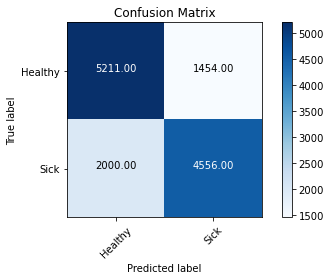

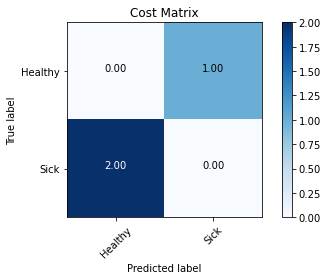

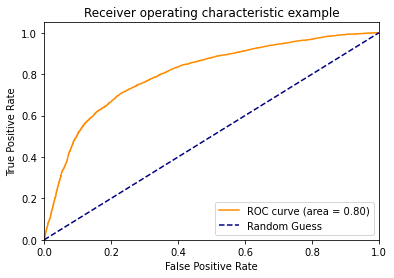


ROC Score:
0.8029562035109142


In [23]:
show_evaluation(y_test, y_pred2, y_proba2)

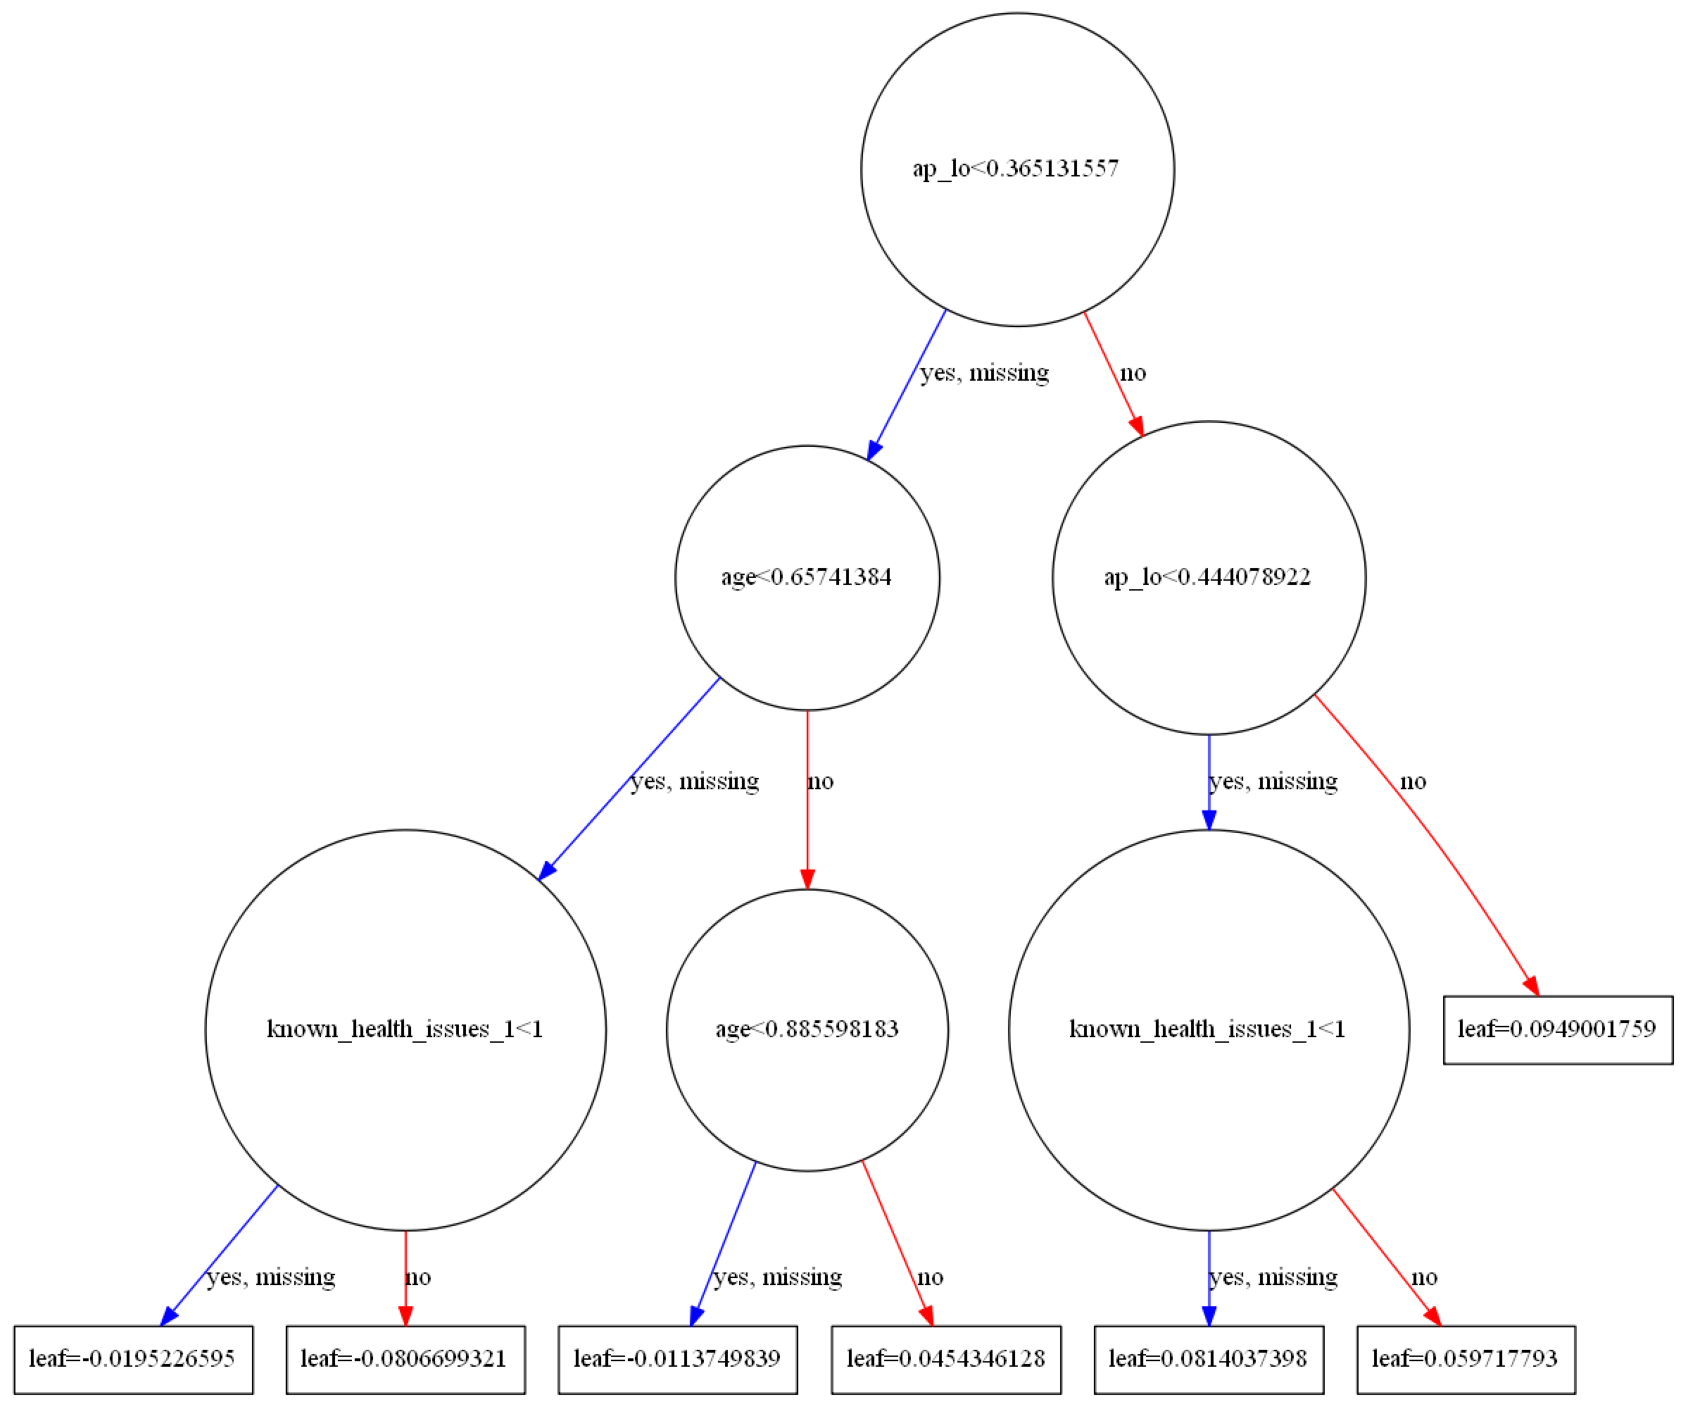

In [24]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model2, num_trees=4, ax=ax)
plt.show()

## Most important variables

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

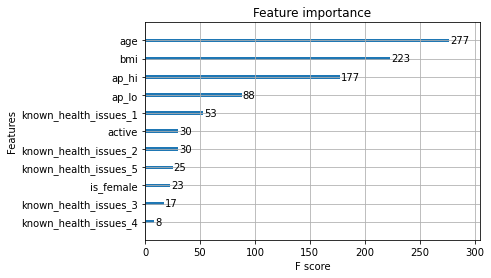

In [25]:
xgb.plot_importance(model2)


### Change learning rate

In [26]:
model3 = XGBClassifier( 
    learning_rate=0.02, 
    n_estimators=140, 
    max_depth=3,
    min_child_weight=5, 
    gamma=0.0, 
    subsample=0.9, 
    colsample_bytree=0.6,
    reg_alpha=2.25,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model3.fit(x_train,y_train)


y_prob3 = model3.predict(x_test.astype('float32'))
y_pred3 = np.round(y_prob3)
y_proba3 = model3.predict_proba(x_test)[:,1]

Accuracy Score:
0.7368580288934271

Precision Score:
0.7692980920707159

Recall Score:
0.6703782794386821

F1-Score:
0.7164398076452849

Cost:
5640



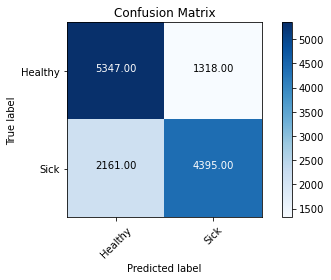

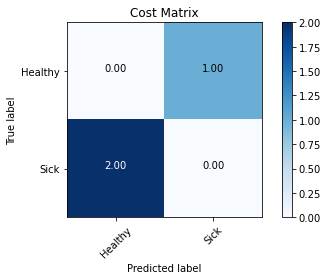

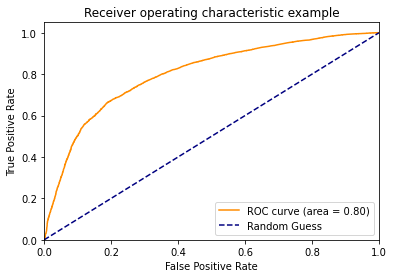


ROC Score:
0.801462041837488


In [27]:
show_evaluation(y_test, y_pred3, y_proba3)

### Save predictions

In [28]:
# Save predictions
method_name = 'XGBoost'
predicted_probabilities = y_proba2
savePredictedProbabilities(method_name, y_test, predicted_probabilities)